In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor  


In [3]:
df=pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns=['math_score'], axis=1)
y=df['math_score']


In [8]:
# Identify numeric and categorical features
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

# Apply transformations
x = preprocessor.fit_transform(x)


In [9]:
x.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [11]:
def evaluate_model(true, predicted):
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    mae= mean_absolute_error(true, predicted)
    r2=r2_score(true, predicted)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    return mse,rmse, mae, r2


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(silent=True),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
}

# Lists to store results
model_list = []
r2_list = []

# Loop through models
for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate model
    # Unpack all four values
    model_train_mse, model_train_rmse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_rmse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(f"R2 Score: {model_train_r2:.4f}, RMSE: {model_train_rmse:.4f}, MAE: {model_train_mae:.4f}, MSE: {model_train_mse:.4f}")


    # Append model name and test R2 score
    model_list.append(name)
    r2_list.append(model_test_r2)

    # Print results
    print(f"Model: {name}")
    print("-" * 40)
    print("Performance on Training Set:")
    print(f"R2 Score: {model_train_r2:.4f}, RMSE: {model_train_rmse:.4f}, MAE: {model_train_mae:.4f}")
    print("Performance on Test Set:")
    print(f"R2 Score: {model_test_r2:.4f}, RMSE: {model_test_rmse:.4f}, MAE: {model_test_mae:.4f}")
    print("=" * 40)



Mean Squared Error: 28.33487038064859
Mean Absolute Error: 4.266711846071957
R2 Score: 0.8743172040139593
Mean Squared Error: 29.095169866715487
Mean Absolute Error: 4.21476314247485
R2 Score: 0.8804332983749565
R2 Score: 0.8743, RMSE: 5.3231, MAE: 4.2667, MSE: 28.3349
Model: Linear Regression
----------------------------------------
Performance on Training Set:
R2 Score: 0.8743, RMSE: 5.3231, MAE: 4.2667
Performance on Test Set:
R2 Score: 0.8804, RMSE: 5.3940, MAE: 4.2148
Mean Squared Error: 32.593399999999995
Mean Absolute Error: 4.5175
R2 Score: 0.8554279731066252
Mean Squared Error: 52.6834
Mean Absolute Error: 5.6370000000000005
R2 Score: 0.7834973847119895
R2 Score: 0.8554, RMSE: 5.7091, MAE: 4.5175, MSE: 32.5934
Model: KNN
----------------------------------------
Performance on Training Set:
R2 Score: 0.8554, RMSE: 5.7091, MAE: 4.5175
Performance on Test Set:
R2 Score: 0.7835, RMSE: 7.2583, MAE: 5.6370
Mean Squared Error: 0.078125
Mean Absolute Error: 0.01875
R2 Score: 0.9996534

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=False)

,Model,R2 Score
7,Ridge,0.880593
0,Linear Regression,0.880433
3,Random Forest,0.854260
6,CatBoost,0.851632
4,AdaBoost,0.850276
5,XGBoost,0.827797
8,Lasso,0.825320
1,KNN,0.783497
2,Decision Tree,0.738779
9,SVR,0.728600


In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)

# Predict on the test set
y_pred = lin_model.predict(x_test)

# Calculate R² score
score = r2_score(y_test, y_pred) * 100  # Convert to percentage

# Print the R² score as a percentage
print(f"R² Score: {score:.2f}%")


R² Score: 88.04%


Text(0, 0.5, 'Predicted')

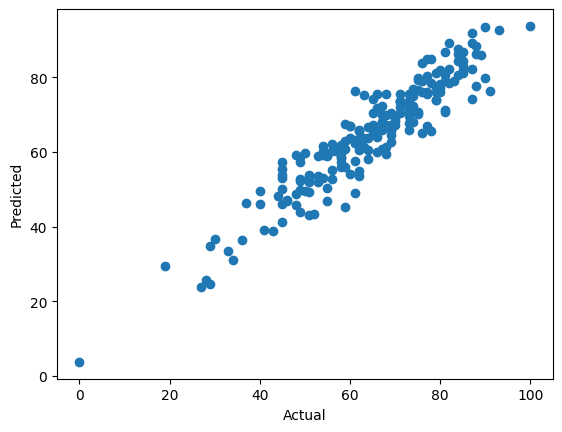

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


<Axes: xlabel='math_score'>

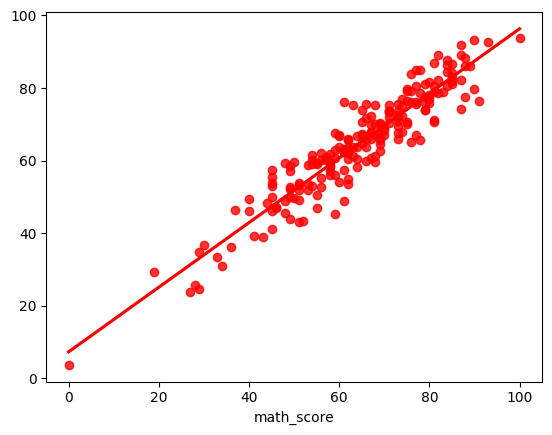

In [18]:
sns.regplot(x=y_test, y=y_pred, color='red', ci=None)

In [19]:
pred_df=pd.DataFrame({"Actual_value":y_test, "Predicted_vale":y_pred, "Difference":y_test-y_pred})
pred_df

,Actual_value,Predicted_vale,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
